# Supply chain data analysis.
- I will go through the standard data analysis procedures to see what I can find in this dataset. Everything will be documented and at the end I will have a notebook, a report as well as a presentation.

1. Importing libraries and loading data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# load the data set
df = pd.read_csv('data/supply_chain_data.csv')

# Let's normalize the column names.
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df = df.rename(columns={
    'lead_times': "customer_lead_time",
    'lead_time': 'procurement_lead_time'
})

df.head()

,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,customer_lead_time,order_quantities,...,location,procurement_lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


This shows the first 5 entries for our data sets.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Data Cleaning and Preprocessing

In [2]:
# Checking for duplicate data.
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicates in our dataset.")
else:
    print("There are no duplicate values in the dataset.")

There are no duplicate values in the dataset.


3. Data Exploration

In [3]:
df.shape

(100, 24)

In [4]:
df.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'customer_lead_time', 'order_quantities',
       'shipping_times', 'shipping_carriers', 'shipping_costs',
       'supplier_name', 'location', 'procurement_lead_time',
       'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs',
       'inspection_results', 'defect_rates', 'transportation_modes', 'routes',
       'costs'],
      dtype='object')

### Columns:

1. Product Category Columns.
- Product Type: Specific type of product.
- SKU: Unique Identifier.

2. Key Metrics Columns.
- Price: Price of the Product.
- Availability: Information about product availability.
- Number of Products sold: The number of products sold in a particular time period.
- Revenue Generated: Total Revenue generated by a product in a specific time period.
- Customer Demographics: Customer Information such as age, gender etc.

3. Supply Chain Details.
- Stock Levels: No. of products available at any given time.
- Lead Times: Time required to order and receive products form the suppliers.
- Order Quantities: The number of products ordered in one order of shipment.
- Shipping time: Time required to ship the product from the warehouse to the customer.
- Shipping carriers: Company used to ship the products.
- Shipping Costs: Costs associated with shiping products.
- Supplier Name: Name of the supplier who provides products or materials to the company.
- Location: The location associated with the data in the supply chain.
- Lead Time: The time required to obtain products or materials from a supplier.
- Production volumes: The number of products produced in a certain time period.
- Manufacturing Lead time: The time required to produce a product, from scratch.
- Manufacturing costs: Costs related to the production process.

4. Quality Metrics.
- Inspection results: Results of the material quality inspection.
- Defect Rates: The level of defects in the products produced.

5. Transportation Details.
- Transportation modes: Mode of the transport for the product.
- Routes: Routes or paths used to send the products from one point to other in the supply chain.
- Costs: Costs related to various aspects of the supply chain, including transportation costs, production costs and other costs.


We will now look at the summary statistics of our code.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
number_of_products_sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
revenue_generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
stock_levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
customer_lead_time,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
order_quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
shipping_times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
shipping_costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
procurement_lead_time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


After generating summary statistics again confirm there are no missing values in our dataset. We also see some additional information about our other columns some containing extreme values that may later need to be scaled for our modelling.

==================================================================================================================================================================================

### Let's now look at some basic visualizations to understand the underlying relationships among our data.

### First we will look at our Categorical Columns

In [6]:
import matplotlib.pyplot as plt

# Let's create a function for our preliminary analysis, this will allow us to use the same funcitonality wherever needed reducing the amount of code we right and improving reusability.

def analyse_column(df, col):
    """
    Function to analyse catgorical columns. Takes two parameters:
    - df: A pandas dataframe that contains our dataset
    - col: Name of the column that we want to analyse.
    
    The fucntion has three parts:
    - For the first part of our function we find the number of uniques values and what those values are.
    - We then plot a graphical representation of our column.
    - Then we display the value counts of that specific column and what their percentage distribution is.
    """
    # Unique values and count
    unique_count = df[col].nunique()
    unique_values = df[col].unique()
    print(f"We have {unique_count} unique values in '{col}' and they are: {unique_values}.\n")
    
    # Plot distribution using seaborn countplot
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    # Display value counts and percentage distribution
    print(f"Distribution of {col}:")
    print(df[col].value_counts())
    print(f"\nPercentage distribution of {col}:")
    print(df[col].value_counts(normalize=True).mul(100).round(1))

We have 3 unique values in 'product_type' and they are: ['haircare' 'skincare' 'cosmetics'].



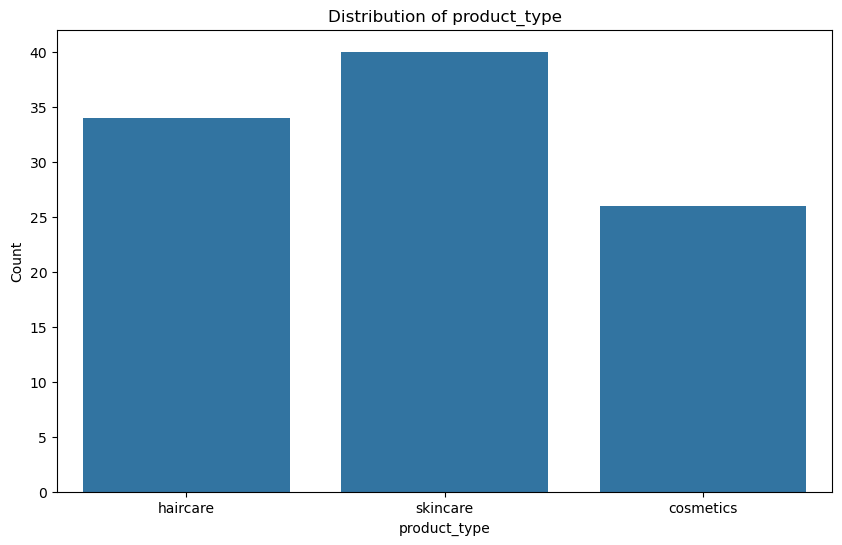

Distribution of product_type:
product_type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Percentage distribution of product_type:
product_type
skincare     40.0
haircare     34.0
cosmetics    26.0
Name: proportion, dtype: float64


In [7]:
# Now everytime we want to analyse a column we will simply call our function.

analyse_column(df, 'product_type')

- We see we have three main product types: `haircare`, `skincare`, `cosmetics`. Let's take a look at their distribution.
- We can see that `skincare products` make up for 40% (majority portion) of our products followed by `haircare` and `cosmetics`.

Let's now look into our customer demographics to see what that can tell us.

We have 4 unique values in 'customer_demographics' and they are: ['Non-binary' 'Female' 'Unknown' 'Male'].



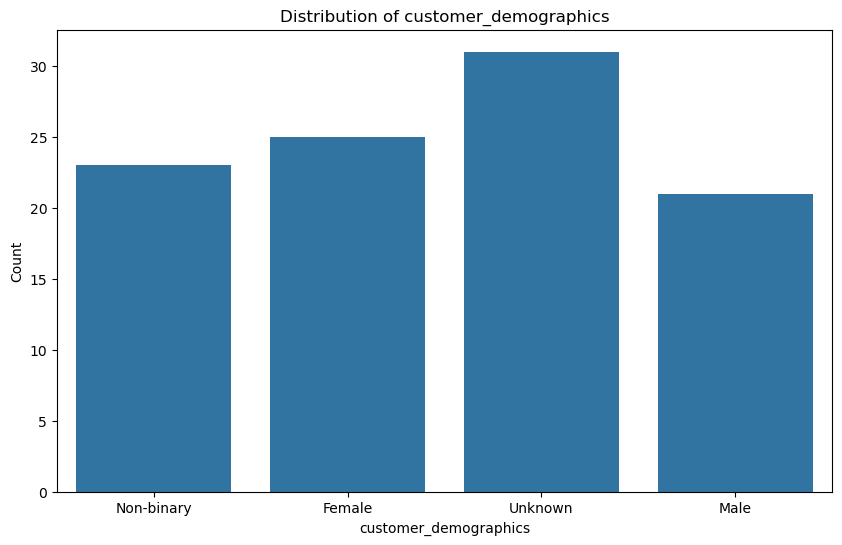

Distribution of customer_demographics:
customer_demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Percentage distribution of customer_demographics:
customer_demographics
Unknown       31.0
Female        25.0
Non-binary    23.0
Male          21.0
Name: proportion, dtype: float64


In [8]:
analyse_column(df, 'customer_demographics')

Here we notice the following:
- Even though our dataset did not have any aparent missing values but in customer demographics we have a lot of `Unknown` values almost making up 31% of our distribution we will later see if we can impute this for something based off of the product they ordered and see what that gives us.

We have 5 unique values in 'supplier_name' and they are: ['Supplier 3' 'Supplier 1' 'Supplier 5' 'Supplier 4' 'Supplier 2'].



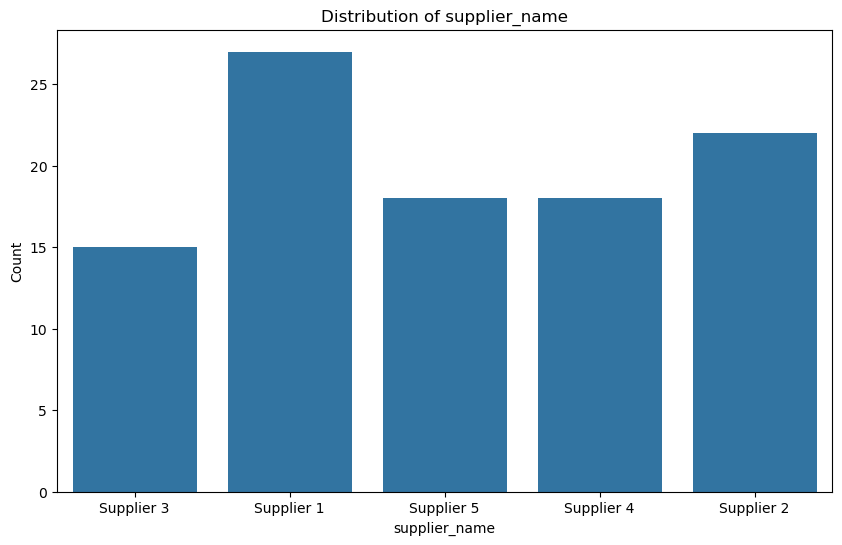

Distribution of supplier_name:
supplier_name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

Percentage distribution of supplier_name:
supplier_name
Supplier 1    27.0
Supplier 2    22.0
Supplier 5    18.0
Supplier 4    18.0
Supplier 3    15.0
Name: proportion, dtype: float64


In [9]:
analyse_column(df, 'supplier_name')

Here we can see that `Supplier 1` is our largest supplier followed by `S2`, `S5`, `S4`, `S3`. Let's follow this up be checking where our suppliers are based.

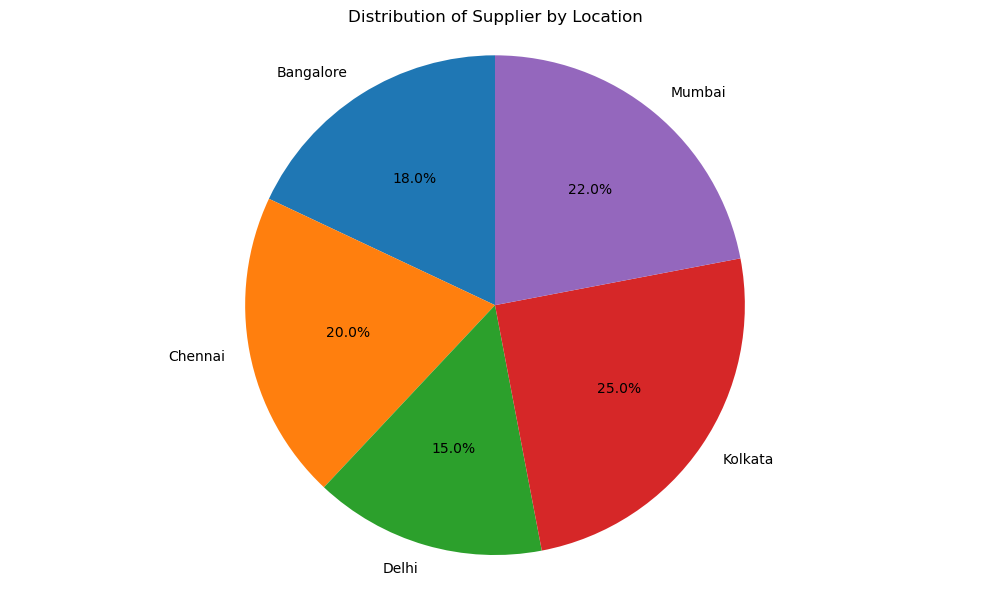

In [10]:
plt.figure(figsize=(10,6))
sup_location = df.groupby('location').size().reset_index(name='count')
plt.pie(sup_location['count'], labels= sup_location['location'], autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Supplier by Location")
plt.axis('equal')
plt.tight_layout()
plt.show()

Here we see that majority of our suppliers are based in `Kolkata` followed by `Mumbai`, `Chennai`, `Bangalore` and `Delhi`.

Now that we have looked at some `categorical columns` and analysed them let's move on to our `numerical columns` and see what that shows us.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Numerical Columns

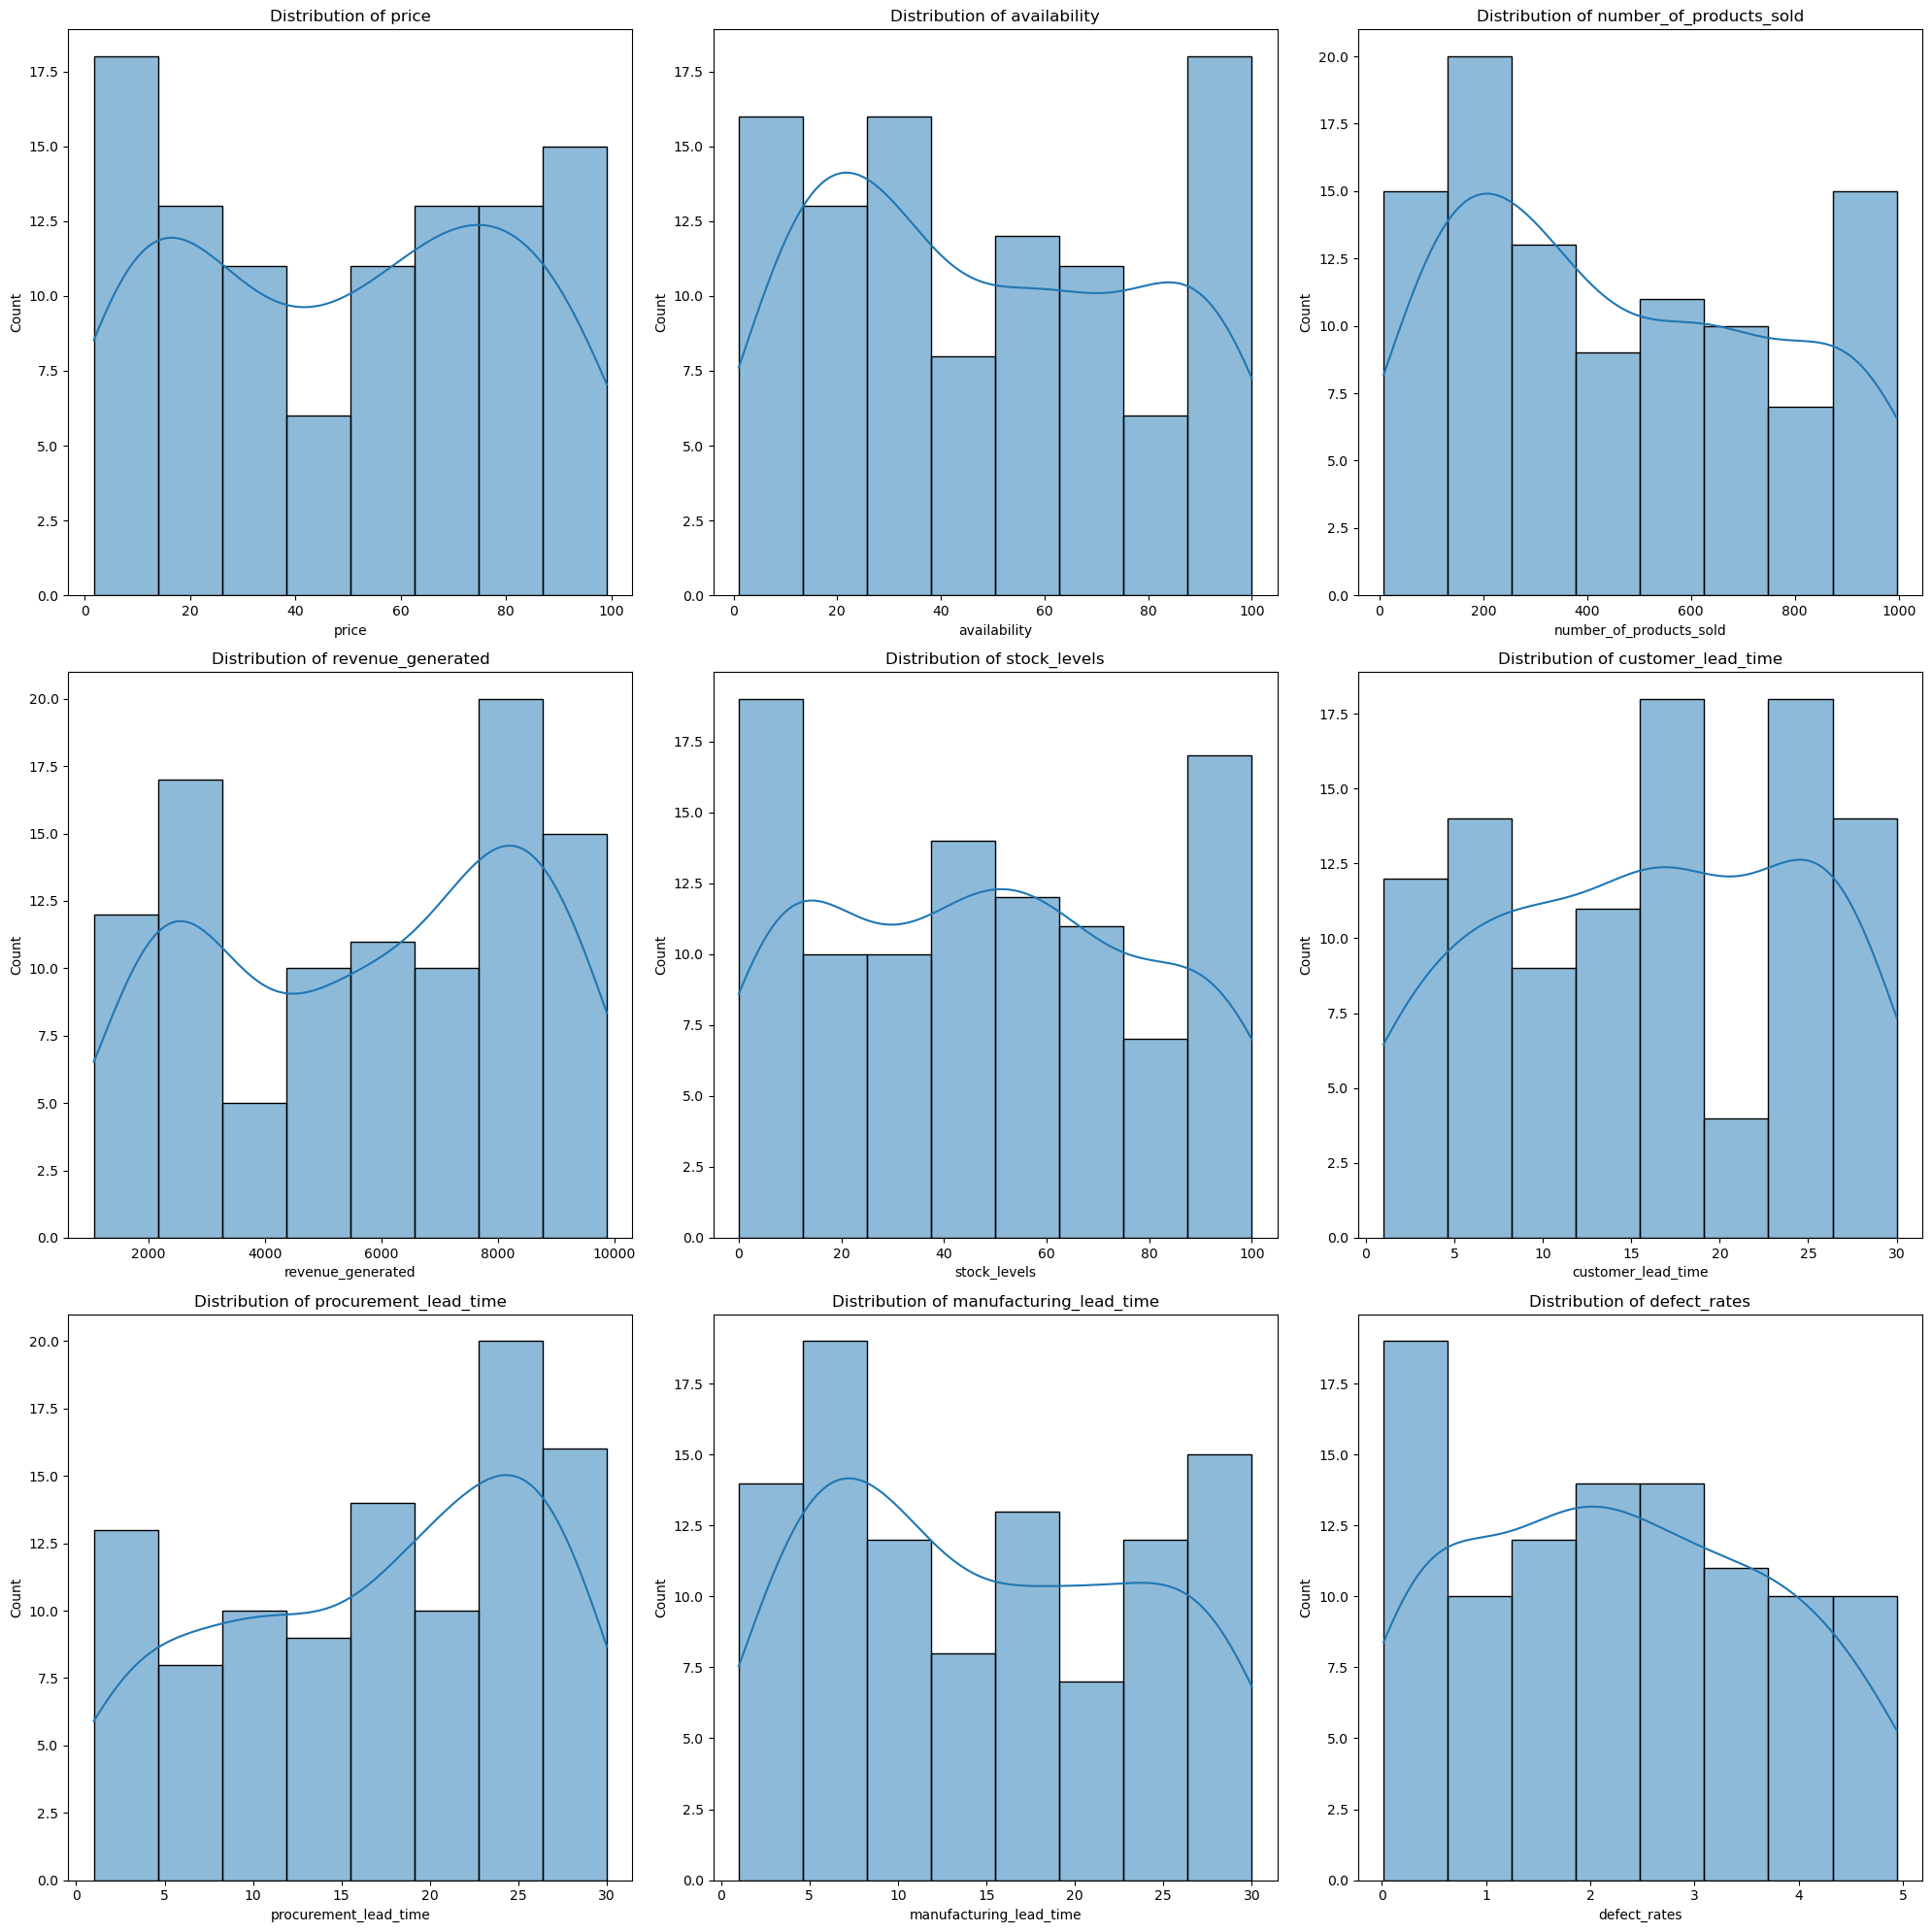

In [11]:
numeric_cols = ['price', 'availability', 'number_of_products_sold', 'revenue_generated',
                'stock_levels', 'customer_lead_time', 'procurement_lead_time', 'manufacturing_lead_time', 'defect_rates']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    
plt.tight_layout()
plt.show()

Let's break these down one by one:

1. Price: Shows two peaks one at the lower range and one at the higher range basically implying we have a slight skew towards low and high priced products.
2. Availability: Shows a higher peak towards the low ranges saying a portion of our stock is on the lower end of availability.
3. Products Sold: Shows a similar of graph as availability that peaks in the lower regions showing major count of sales between 0-200 range and another peak near the 800-1000 range.
4. Revenue Generated: Shows two peaks one on the lower end and a large one at the higher end showcasing we have a higher product percentage generating revenue 8000 and above.
5. Stock levels: Shows that we have a peak at the low ranges showing we have low availability on some stocks the mid and high ranges look promising showing no concern.
6. Customer Lead Time: Shows that we have a major portion of our products on the lower end of the lead times showing little to no delays in delivery.
7. Procurement Lead Time: Shows that we have a peak at the higher end meaning there is a large percentage of our products that have long procurement times.
8. Manufacturing Lead Time: Shows that we have a large percentage of our manufactures who are pretty quick at their end of the tasks.
9. Defect Rate: Shows that majority of our products have zero defects but has a comparitively higher percentage that has between 2-3 defects.

Now let's look at a correlation matrix for the numerical variables and see what that tells us.

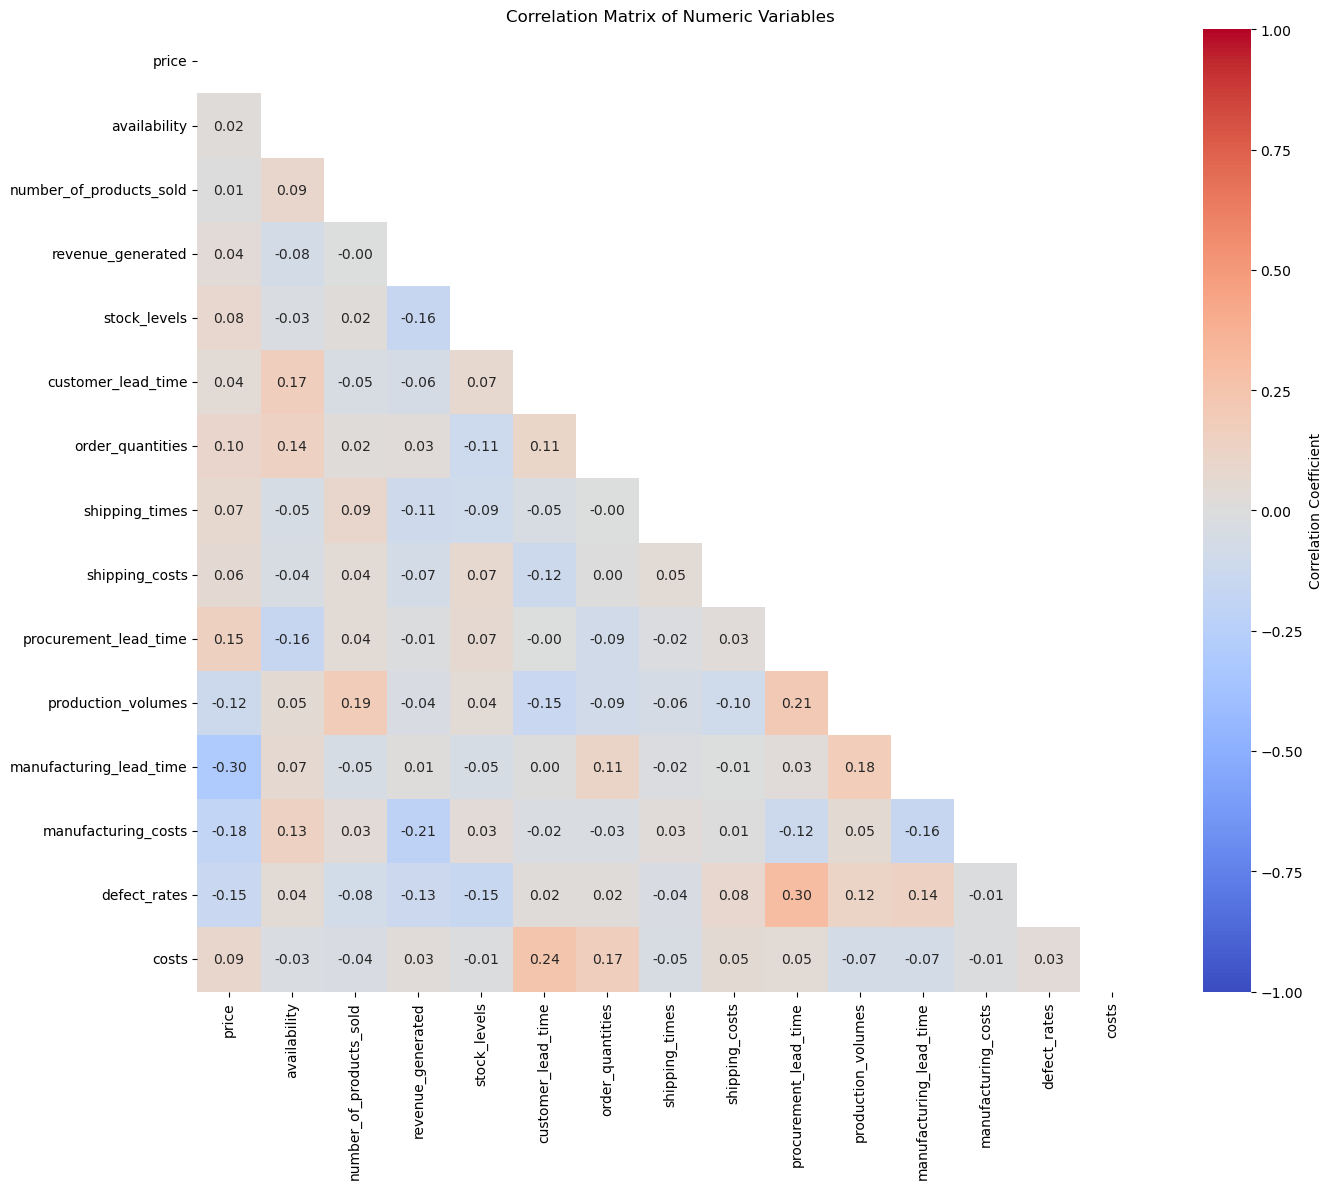

In [12]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(14,12))
correlation = numeric_df.corr()
mask = np.triu(np.ones_like(correlation, dtype= bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

There is not much to see here, there seems to be some postive weak correlation between `customer_lead_time` and `costs`, `defect_rates` and `procurement_lead_time`, `procurement_lead_time` and `production_volumes`.

==================================================================================================================================================================================

### Category Performance Metrics
Now that we have looked into some basic visualizations let's look into some more complex ones.

In [13]:
category_performance = df.groupby('product_type').agg({
    'sku': 'count',
    'price': 'mean',
    'number_of_products_sold': 'sum',
    'revenue_generated': 'sum',
    'defect_rates': 'mean'
}).reset_index()

category_performance['Average Revenue per SKU'] = category_performance['revenue_generated'] / category_performance['sku']
category_performance['Total Sales Volume'] = category_performance['number_of_products_sold']
category_performance.rename(columns={
    'sku': 'Number of SKUs',
    'price': 'Average Price',
    'number_of_products_sold': 'Total Units Sold',
    'revenue_generated': 'Total Revenue',
    'defect_rates': 'Average Defect Rate'
}, inplace=True)

print("Category Performance Summary:")
category_performance

Category Performance Summary:


,product_type,Number of SKUs,Average Price,Total Units Sold,Total Revenue,Average Defect Rate,Average Revenue per SKU,Total Sales Volume
0,cosmetics,26,57.361058,11757,161521.265999,1.919287,6212.356385,11757
1,haircare,34,46.014279,13611,174455.390605,2.483150,5131.040900,13611
2,skincare,40,47.259329,20731,241628.162133,2.334681,6040.704053,20731


We can see that `skincare` generates the most revenue followed by `haircare` and `cosmetics` also has a medial average defect rate and accounts for the largest sales volume. Let's now generate some graphics to visualize this.

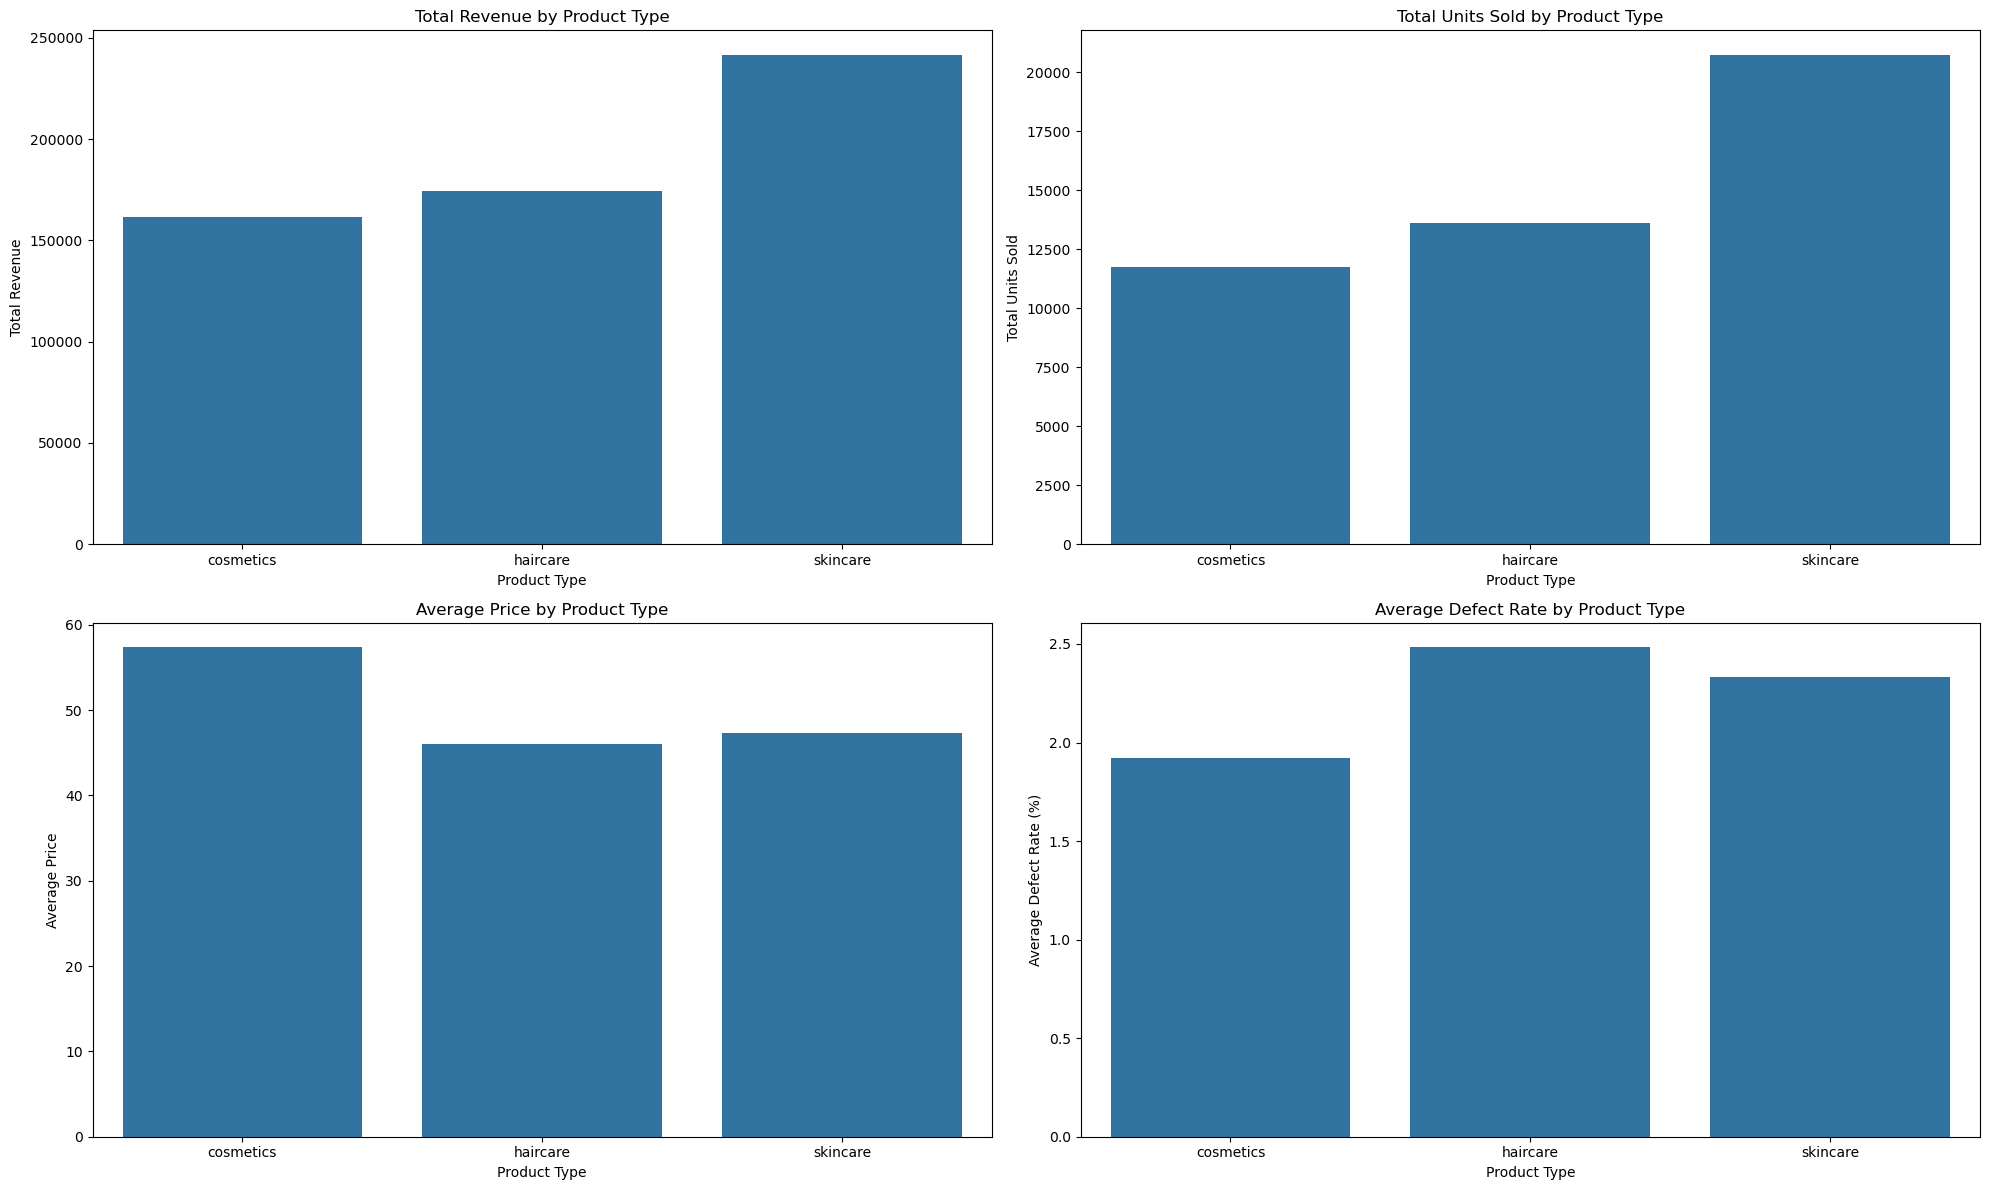

In [14]:
# Visualize Category Performance
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Revenue by Category
sns.barplot(x='product_type', y='Total Revenue', data=category_performance, ax=axes[0, 0])
axes[0, 0].set_title('Total Revenue by Product Type')
axes[0, 0].set_xlabel('Product Type')
axes[0, 0].set_ylabel('Total Revenue')

# Units Sold by Category
sns.barplot(x='product_type', y='Total Units Sold', data=category_performance, ax=axes[0, 1])
axes[0, 1].set_title('Total Units Sold by Product Type')
axes[0, 1].set_xlabel('Product Type')
axes[0, 1].set_ylabel('Total Units Sold')

# Average Price by Category
sns.barplot(x='product_type', y='Average Price', data=category_performance, ax=axes[1, 0])
axes[1, 0].set_title('Average Price by Product Type')
axes[1, 0].set_xlabel('Product Type')
axes[1, 0].set_ylabel('Average Price')

# Average Defect Rate by Category
sns.barplot(x='product_type', y='Average Defect Rate', data=category_performance, ax=axes[1, 1])
axes[1, 1].set_title('Average Defect Rate by Product Type')
axes[1, 1].set_xlabel('Product Type')
axes[1, 1].set_ylabel('Average Defect Rate (%)')

plt.tight_layout()
plt.show()


This more or less confirms our findings from earlier but allowing us to visually understand what the previous metrics mean. Let's no look at some of our best and worst selling `SKUs`.

In [15]:
# Top 10 SKUs by Revenue
top_revenue = df.sort_values('revenue_generated', ascending=False).head(10)
print("Top 10 SKUs by Revenue:")
top_revenue[['sku', 'product_type', 'price', 'number_of_products_sold', 'revenue_generated', 'availability']]

Top 10 SKUs by Revenue:


,sku,product_type,price,number_of_products_sold,revenue_generated,availability
51,SKU51,haircare,26.700761,154,9866.465458,61
38,SKU38,cosmetics,52.075931,705,9692.318040,75
31,SKU31,skincare,50.847393,168,9655.135103,28
90,SKU90,skincare,13.881914,320,9592.633570,56
2,SKU2,haircare,11.319683,8,9577.749626,34
32,SKU32,skincare,79.209936,781,9571.550487,43
67,SKU67,skincare,87.755432,513,9473.798033,16
88,SKU88,cosmetics,75.270407,737,9444.742033,58
52,SKU52,skincare,98.031830,820,9435.762609,1
18,SKU18,haircare,36.443628,620,9364.673505,23


The above code shows us our top performing `SKUs` we see that SKU 51 is our top seller with maximum revenue generated. Let's follow thi sup by looking at our bottom performers.

In [16]:
# Bottom 10 SKUs by Revenue
bottom_revenue = df.sort_values('revenue_generated').head(10)
print("\nBottom 10 SKUs by Revenue:")
bottom_revenue[['sku', 'product_type', 'price', 'number_of_products_sold', 'revenue_generated', 'availability']]


Bottom 10 SKUs by Revenue:


,sku,product_type,price,number_of_products_sold,revenue_generated,availability
59,SKU59,cosmetics,63.828398,484,1061.618523,30
86,SKU86,skincare,19.998177,223,1229.591029,18
78,SKU78,haircare,6.306883,946,1292.458418,50
57,SKU57,haircare,49.263205,227,1605.866900,65
69,SKU69,skincare,54.865529,511,1752.381087,62
42,SKU42,skincare,46.529168,155,1839.609426,98
75,SKU75,skincare,92.996884,106,1889.073590,29
39,SKU39,skincare,19.127477,176,1912.465663,26
91,SKU91,cosmetics,62.111965,916,1935.206794,90
58,SKU58,skincare,59.841561,896,2021.149810,81


Here we notice that SKU59 is our lowest performing SKU and has the least revenue generated. Let's now look if this is tied to defect rates.

In [17]:
# SKUs with High Defect Rates
high_defect = df.sort_values('defect_rates', ascending=False).head(10)
print("\nTop 10 SKUs with Highest Defect Rates:")
high_defect[['sku', 'product_type', 'defect_rates', 'supplier_name', 'location']]


Top 10 SKUs with Highest Defect Rates:


,sku,product_type,defect_rates,supplier_name,location
42,SKU42,skincare,4.939255,Supplier 5,Bangalore
65,SKU65,skincare,4.911096,Supplier 5,Kolkata
1,SKU1,skincare,4.854068,Supplier 3,Mumbai
84,SKU84,haircare,4.843457,Supplier 5,Chennai
50,SKU50,cosmetics,4.754801,Supplier 2,Delhi
3,SKU3,skincare,4.746649,Supplier 5,Kolkata
73,SKU73,cosmetics,4.620546,Supplier 4,Chennai
2,SKU2,haircare,4.580593,Supplier 1,Mumbai
55,SKU55,haircare,4.548920,Supplier 2,Delhi
61,SKU61,haircare,4.367471,Supplier 4,Kolkata


We do see some relation between these two as `SKU42` a skincare product is in both of these sets. Let's follow this up looking at SKUs that have low availability but high sales.

In [18]:
# Low Availability but High Sales
low_avail_high_sales = df[df['availability'] < 30].sort_values('number_of_products_sold', ascending=False).head(10)
print("\nTop 10 SKUs with Low Availability (<30%) but High Sales:")
low_avail_high_sales[['sku', 'product_type', 'availability', 'number_of_products_sold', 'stock_levels']]


Top 10 SKUs with Low Availability (<30%) but High Sales:


,sku,product_type,availability,number_of_products_sold,stock_levels
10,SKU10,skincare,11,996,51
37,SKU37,skincare,5,963,25
4,SKU4,skincare,26,871,5
52,SKU52,skincare,1,820,64
81,SKU81,haircare,9,774,48
55,SKU55,haircare,16,701,97
71,SKU71,cosmetics,14,637,76
99,SKU99,haircare,17,627,55
54,SKU54,haircare,11,622,33
18,SKU18,haircare,23,620,10


Here we see that we do have some SKUs that are high in demand but low in stock_levels, these need to be monitored and will be looked at again later when we perform our supply chain focused analysis in which we will look at some key metrics like EOQ.

Let's now perform a Price vs. Sales Volume Analysis

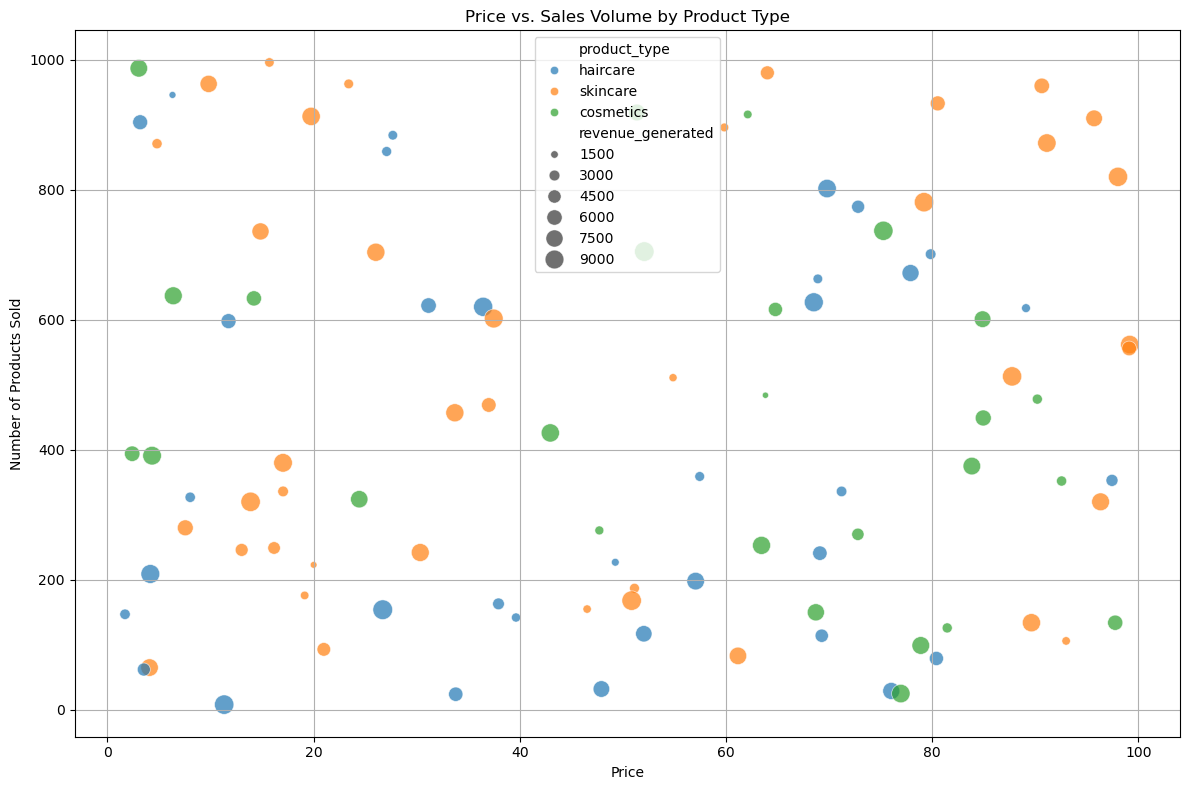

In [19]:
# Price vs Sales Volume Analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='number_of_products_sold', hue='product_type', size='revenue_generated', 
                sizes=(20, 200), alpha=0.7)
plt.title('Price vs. Sales Volume by Product Type')
plt.xlabel('Price')
plt.ylabel('Number of Products Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

- Here we see that a lot of our `haircare` distribution is on the lower end with some outliers on the high spectrum this would mean that haircare has an extended variance over price but not so much over number of products sold.

- Although it is quiet opposite for `cosmestics` and `skincare` with skincare being on the higher end of both spectrums showing that skincare is truly our best performing category.

Let's now calculate approximate price elasticity using correlation to see what that reveals.

In [20]:
price_sales_correlation = df.groupby('product_type')[['price', 'number_of_products_sold']].corr().iloc[::2, 1].reset_index()
price_sales_correlation.columns = ['product_type', 'drop', 'Price-Sales Correlation']
price_sales_correlation = price_sales_correlation.drop('drop', axis=1)

print("Price-Sales Volume Correlation by Product Type (approximation of price elasticity):")
price_sales_correlation


Price-Sales Volume Correlation by Product Type (approximation of price elasticity):


,product_type,Price-Sales Correlation
0,cosmetics,-0.368708
1,haircare,0.022572
2,skincare,0.172934


The Price-Sales Volume Correlation by Product Type reveals varying relationships between price and sales volume across different categories. 

- `Cosmetics` exhibit a moderate negative correlation (-0.369), suggesting that higher prices tend to reduce sales volume, indicating relatively price-sensitive demand. 
- `Haircare` shows a near-zero correlation (0.023), suggesting minimal or no relationship between price and sales volume, potentially indicating inelastic demand. 
- `Skincare` displays a weak positive correlation (0.173), implying that higher prices may slightly correspond to higher sales, possibly reflecting perceived quality or brand loyalty.

Let's follow this up by looking into demogaphic preferances based off of Product Type.

Product Type Preference by Demographics (%):


<Figure size 1200x800 with 0 Axes>

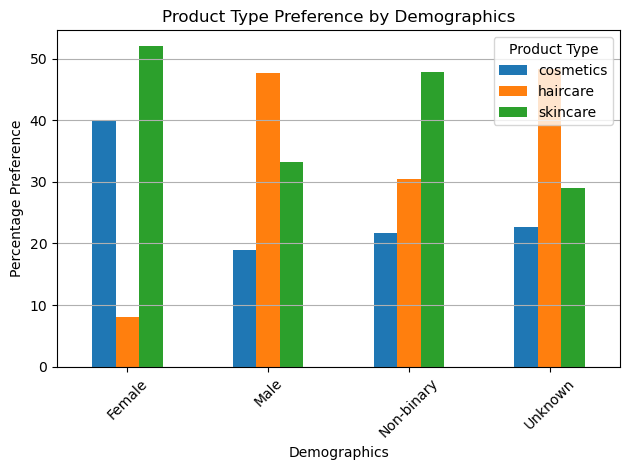

In [21]:
demo_product = pd.crosstab(df['customer_demographics'], df['product_type'], normalize='index')
demo_product = demo_product.mul(100).round(1)

print("Product Type Preference by Demographics (%):")
demo_product

# Visualize demographic preferences
plt.figure(figsize=(12, 8))
demo_product.plot(kind='bar', stacked=False)
plt.title('Product Type Preference by Demographics')
plt.xlabel('Demographics')
plt.ylabel('Percentage Preference')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

| Demographics | Cosmetics (%) | Haircare (%) | Skincare (%) |
|--------------|---------------|---------------|----------------|
| Female       | 40            | 8             | 52             |
| Male         | 19            | 48            | 33             |
| Non-binary   | 22            | 31            | 47             |
| Unknown      | 23            | 48            | 29             |

With this we can clearly see a bias towards the type of product.

- Female: prefer skincare and cosmetics compared to haircare.
- Males: prefer haircare and skincare compared to cosmetics.
- Non-binary: prefer skincare and haircare compared to cosmetics.
- Unknown: prefer haircare and skincare comparde to cosmetics showing most similarity in metrics as well as trend when compared to males this can give us the asusmption that `Unknown` may be interchangeable with `Male`.

With this we can see that we have enough insights about our dataset to proceed with Eficiency Analysis. 

Just to recap here are the things we have discovered:
- We have the most SKUs of `skincare`.
- Our largest customer demographic apart from `Unknown` is `Female`.
- `Supplier 1` is our largest supplier.
- `Kolkata` is the location with our largest supplier presence.
- `Skincare` is our best performing category iwth a total revenue of `241628`.
- `SKU51` `haircare` is our best performing product.
- `SKU59` `cosmetics` is our lowest performing product.
- `SKU42` `skincare` has the highest recorded number of defects.
- `SKU10` `skincare` has low availability but high number of units sold ~1000.

-------------------------------------------------------------------------------